In [1]:
from fastai.vision.all import *
from fastai.distributed import *
from fastai.callback.tracker import SaveModelCallback
from fastprogress import fastprogress
import torch
import argparse
from models.utils.joiner2 import Joiner
from models.utils.new_losses import CriticLoss
from models.utils.metrics import Accuracy

In [2]:
H = 32
W= 32
bs = 5
nclass = 10
backbone = False
epochs = 60

beta = 0.005
gamma = 0.0005
sigma = 1.0

seed = 1234

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [3]:
model = Joiner(num_encoder_layers = 6, nhead=8, backbone = backbone, num_classes = nclass, bypass=False, hidden_dim=256, 
          batch_size=bs, image_h=H, image_w=W,grid_l=4,penalty_factor="2")

In [4]:
path = untar_data(URLs.CIFAR)

transform = ([*aug_transforms(),Normalize.from_stats([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

data = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=parent_label,
                 item_tfms=Resize(H,W),
                 batch_tfms=transform)

dloader = data.dataloaders(path,bs=bs) 

In [5]:
critic_loss = CriticLoss(beta,sigma)

In [6]:
learner = Learner(dloader, model, loss_func=critic_loss, metrics=[Accuracy])

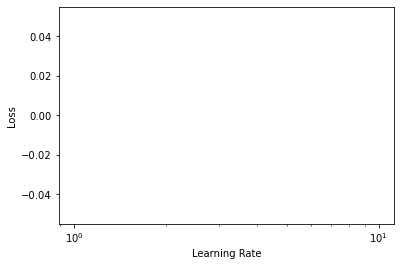

In [7]:
learner.lr_find()

In [ ]:
learner.fit(epochs, 2e-7)